# Description

This dataset contains information about used cars listed on www.cardekho.com
This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.
The columns in the given dataset are as follows:

    name
    year
    selling_price
    km_driven
    fuel
    seller_type
    transmission
    Owner

For used motorcycle datasets please go to https://www.kaggle.com/nehalbirla/motorcycle-dataset

# Steps Involved:


- [Reading and Understanding the Dataset](#1)
- [Data Preporcessing](#2)
- [Exploratory Data Analysis (EDA)](#3)
    - [Univariate Analysis](#3_a)
    - [Bivariate/Multi-Variate Analysis](#3_b)
- [Data Preparation ](#4)
    - [Creating dummies for categorical features](#4_a)
    - [Performing Train-Test split](#4_b)
- [Model Creation/Evaluation](#5)
- [Conclusion](#6)

<a id='1'></a>
# 1. Reading and Understanding the Dataset

In [1]:
# Importing prerequisites
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

%matplotlib inline
pd.set_option("display.max_rows", None,"display.max_columns", None)
warnings.simplefilter(action='ignore')
plt.style.use('seaborn')

In [3]:
# Reading cat data.csv
df_main = pd.read_csv('car data.csv')

In [4]:
df_main.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df_main.shape

(301, 9)

In [6]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
# Checking numerical stats
df_main.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
# Checking for missing values
df_main.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

<a id='2'></a>
# 2. Data Preprocessing

Extracting Age of car using Year column

In [9]:
df_main['Age'] = 2022 - df_main['Year']
df_main.drop('Year',axis=1,inplace = True)

Renaming columns for better clarity

In [10]:
df_main.rename(columns = {'Selling_Price':'Selling_Price(lacs)','Present_Price':'Present_Price(lacs)',
                          'Owner':'Past_Owners'},inplace = True)

<a id='3'></a>
# 3. Exploratory Data Analysis (EDA)

<a id="3_a"></a>
## a) Univariate Analysis

In [11]:
df_main.columns

Index(['Car_Name', 'Selling_Price(lacs)', 'Present_Price(lacs)', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Past_Owners', 'Age'],
      dtype='object')

##### Plotting Categorical Columns

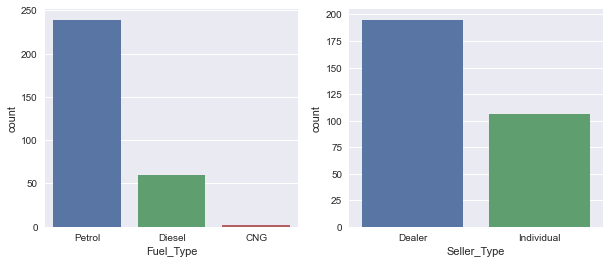

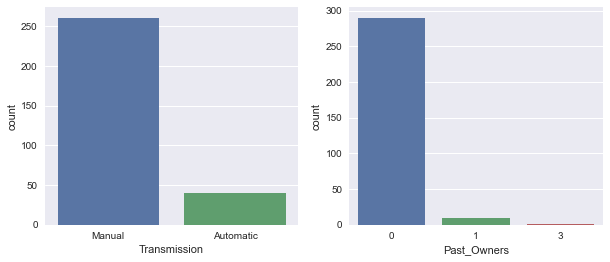

In [12]:
cat_cols = ['Fuel_Type','Seller_Type','Transmission','Past_Owners']
i=0
while i < 4:
    fig = plt.figure(figsize=[10,4])
    #ax1 = fig.add_subplot(121)
    #ax2 = fig.add_subplot(122)
    
    #ax1.title.set_text(cat_cols[i])
    plt.subplot(1,2,1)
    sns.countplot(x=cat_cols[i], data=df_main)
    i += 1
    
    #ax2.title.set_text(cat_cols[i])
    plt.subplot(1,2,2)
    sns.countplot(x=cat_cols[i], data=df_main)
    i += 1
    
    plt.show()

##### Plotting numerical columns

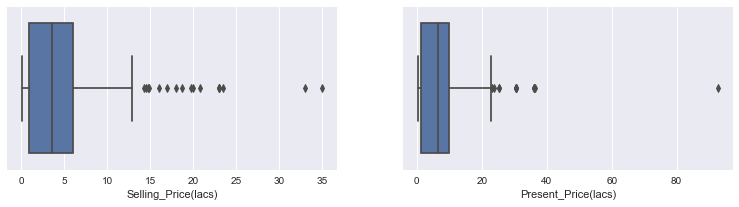

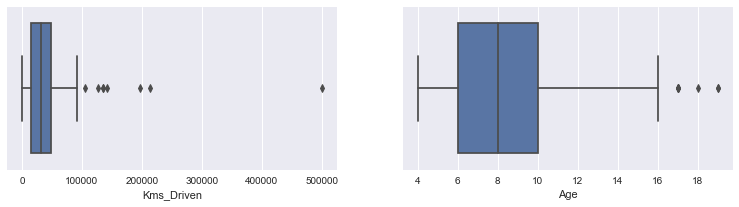

In [13]:
num_cols = ['Selling_Price(lacs)','Present_Price(lacs)','Kms_Driven','Age']
i=0
while i < 4:
    fig = plt.figure(figsize=[13,3])
    #ax1 = fig.add_subplot(121)
    #ax2 = fig.add_subplot(122)
    
    #ax1.title.set_text(num_cols[i])
    plt.subplot(1,2,1)
    sns.boxplot(x=num_cols[i], data=df_main)
    i += 1
    
    #ax2.title.set_text(num_cols[i])
    plt.subplot(1,2,2)
    sns.boxplot(x=num_cols[i], data=df_main)
    i += 1
    
    plt.show()

**Checking outliiers in Present_Price, Selling_Price and Kms_Driven**

In [14]:
df_main[df_main['Present_Price(lacs)'] > df_main['Present_Price(lacs)'].quantile(0.99)]

,Car_Name,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners,Age
64,fortuner,33.0,36.23,6000,Diesel,Dealer,Automatic,0,5
86,land cruiser,35.0,92.60,78000,Diesel,Dealer,Manual,0,12


In [15]:
df_main[df_main['Selling_Price(lacs)'] > df_main['Selling_Price(lacs)'].quantile(0.99)]

,Car_Name,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners,Age
63,fortuner,23.5,35.96,47000,Diesel,Dealer,Automatic,0,7
64,fortuner,33.0,36.23,6000,Diesel,Dealer,Automatic,0,5
86,land cruiser,35.0,92.60,78000,Diesel,Dealer,Manual,0,12


In [16]:
df_main[df_main['Kms_Driven'] > df_main['Kms_Driven'].quantile(0.99)]

,Car_Name,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners,Age
84,innova,3.49,13.46,197176,Diesel,Dealer,Manual,0,17
179,Honda Karizma,0.31,1.05,213000,Petrol,Individual,Manual,0,12
196,Activa 3g,0.17,0.52,500000,Petrol,Individual,Automatic,0,14


<a id="3_b"></a>
## b) Bivariate/Multi-Variate Analysis

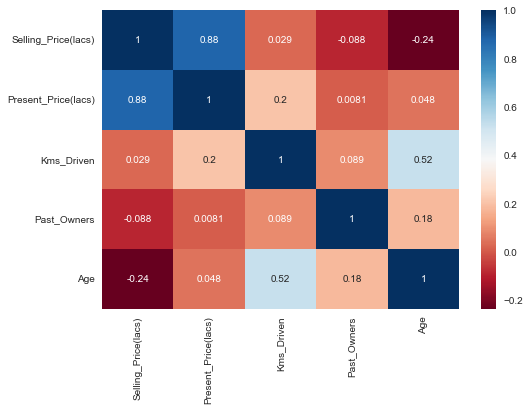

In [17]:
sns.heatmap(df_main.corr(), annot=True, cmap="RdBu")
plt.show()

In [18]:
df_main.corr()['Selling_Price(lacs)']

Selling_Price(lacs)    1.000000
Present_Price(lacs)    0.878983
Kms_Driven             0.029187
Past_Owners           -0.088344
Age                   -0.236141
Name: Selling_Price(lacs), dtype: float64

<b>Inferences:</b>
- Present price and resale price are highly correlated, as observed in EDA.
- Age of the vehicle seems to show negative correlation with selling price.
- Past_Owners and Kms_Driven seems to show very less correlation with selling price.

Checking average selling price of vehicle based on its Seller type and Fuel type

In [19]:
df_main.pivot_table(values='Selling_Price(lacs)', index = 'Seller_Type', columns= 'Fuel_Type')

Fuel_Type,CNG,Diesel,Petrol
Seller_Type,,,
Dealer,3.1,10.181525,5.252388
Individual,NaN,16.000000,0.726857


<b>Inferences:</b> Diesel Vehicles fetch higher price compared to petrol & CNG for both sellers.

Checking average selling price of vehicle based on its Seller type and Transmission

In [20]:
df_main.pivot_table(values='Selling_Price(lacs)', index = 'Seller_Type', columns= 'Transmission')

Transmission,Automatic,Manual
Seller_Type,,
Dealer,12.246552,5.756506
Individual,1.968182,0.743895


<b>Inferences:</b> Automatic vehicles fetch higher resale price compared to manual ones.

<a id="4"></a>
# 4. Data Preparation

<a id="4_a"></a>
##  a) Creating  dummies for categorical features

Dropping Car_Name column

In [21]:
df_main.drop(labels='Car_Name',axis= 1, inplace = True)

Converting categorical columns into integers using 1-hot encoding.

In [22]:
df_main.head()

,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners,Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [23]:
df_main = pd.get_dummies(data = df_main,drop_first=True) 
# drop_first is set to True, to avoid "Dummy Trap"

In [24]:
df_main.head()

,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Past_Owners,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1


<a id="4_b"></a>
## b) Performing Train-Test Split

In [25]:
# Separating target variable and its features
y = df_main['Selling_Price(lacs)']
X = df_main.drop('Selling_Price(lacs)',axis=1)

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (240, 8)
x test:  (61, 8)
y train:  (240,)
y test:  (61,)


<a id="5"></a>
# 5. Model Creation/Evaluation

## a) Applying regression models
- Linear Regression (OLS)
- Ridge Regression
- Lasso Regression
- Random Forest Regression
- Gradient Boosting regression

In [28]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
import pickle

In [29]:
CV = []
R2_train = []
R2_test = []
# Makes folder if it dosen't exist
if not os.path.exists("Car_pred_models"):
    os.mkdir("Car_pred_models")

def car_pred_model(model,model_name):
    # Training model
    model.fit(X_train,y_train)
            
    # R2 score of train set
    y_pred_train = model.predict(X_train)
    R2_train_model = r2_score(y_train,y_pred_train)
    R2_train.append(round(R2_train_model,2))
    
    # R2 score of test set
    y_pred_test = model.predict(X_test)
    R2_test_model = r2_score(y_test,y_pred_test)
    R2_test.append(round(R2_test_model,2))
    
    # R2 mean of train set using Cross validation
    cross_val = cross_val_score(model ,X_train ,y_train ,cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean,2))
    
    # Printing results
    print("Train R2-score :",round(R2_train_model,2))
    print("Test R2-score :",round(R2_test_model,2))
    print("Train CV scores :",cross_val)
    print("Train CV mean :",round(cv_mean,2))
    
    # Plotting Graphs 
    # Residual Plot of train data
    fig, ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Residual Plot of Train samples')
    sns.distplot((y_train-y_pred_train),hist = False,ax = ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')
    
    # Y_test vs Y_train scatter plot
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(x = y_test, y = y_pred_test)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')
    
    plt.show()
    
    # Saving model to a file using pickle
    model_path = '.\\Car_pred_models\\'+model_name
    file = open(model_path,'wb')
    pickle.dump(model,file) 

### 1) Standard Linear Regression or Ordinary Least Squares

Train R2-score : 0.88
Test R2-score : 0.86
Train CV scores : [0.89912189 0.89838688 0.82980069 0.81769076 0.76113925]
Train CV mean : 0.84


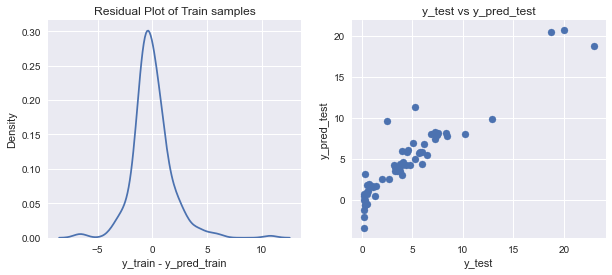

In [30]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
car_pred_model(lr,"Linear_regressor.pkl")

### 2) Ridge

In [31]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

# Creating Ridge model object
rg = Ridge()
# range of alpha 
alpha = np.logspace(-3,3,num=14)

# Creating RandomizedSearchCV to find the best estimator of hyperparameter
rg_rs = RandomizedSearchCV(estimator = rg, param_distributions = dict(alpha=alpha))

Train R2-score : 0.88
Test R2-score : 0.86
Train CV scores : [0.89912009 0.8983878  0.82980292 0.81769155 0.73377277]
Train CV mean : 0.84


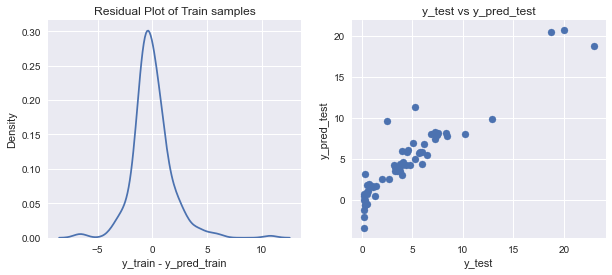

In [32]:
car_pred_model(rg_rs,"ridge.pkl")

### 3) Lasso

In [33]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV

ls = Lasso()
alpha = np.logspace(-3,3,num=14) # range for alpha

ls_rs = RandomizedSearchCV(estimator = ls, param_distributions = dict(alpha=alpha))

Train R2-score : 0.88
Test R2-score : 0.86
Train CV scores : [0.89913828 0.89975361 0.8301628  0.81769086 0.73120322]
Train CV mean : 0.84


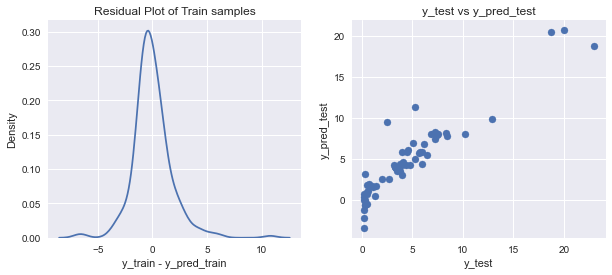

In [34]:
car_pred_model(ls_rs,"lasso.pkl")

### 4) Random Forest

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()

# Number of trees in Random forest
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

rf_rs = RandomizedSearchCV(estimator = rf, param_distributions = param_grid)

Train R2-score : 0.95
Test R2-score : 0.82
Train CV scores : [0.88645543 0.97267408 0.81972147 0.8897929  0.7419845 ]
Train CV mean : 0.86


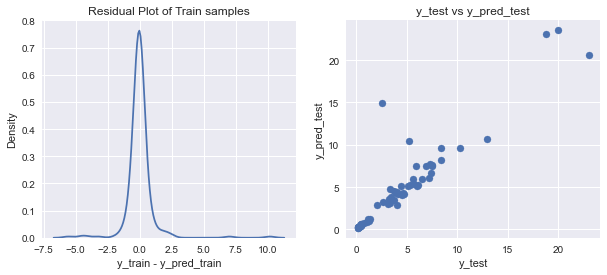

In [36]:
car_pred_model(rf_rs,'random_forest.pkl')

In [37]:
#print(rf_rs.best_score_)
#print(rf_rs.best_estimator_)

### 5) Gradient Boosting

In [38]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

gb = GradientBoostingRegressor()

# Rate at which correcting is being made
learning_rate = [0.001, 0.01, 0.1, 0.2]
# Number of trees in Gradient boosting
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"learning_rate":learning_rate,
              "n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

gb_rs = RandomizedSearchCV(estimator = gb, param_distributions = param_grid)

Train R2-score : 0.98
Test R2-score : 0.77
Train CV scores : [0.94246214 0.90210262 0.89253254 0.92436897 0.74338049]
Train CV mean : 0.88


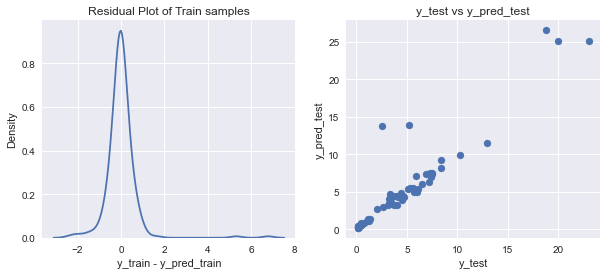

In [39]:
car_pred_model(gb_rs,"gradient_boosting.pkl")

In [40]:
Technique = ["LinearRegression","Ridge","Lasso","RandomForestRegressor","GradientBoostingRegressor"]
results=pd.DataFrame({'Model': Technique,'R Squared(Train)': R2_train,'R Squared(Test)': R2_test,'CV score mean(Train)': CV})
display(results)

,Model,R Squared(Train),R Squared(Test),CV score mean(Train)
0,LinearRegression,0.88,0.86,0.84
1,Ridge,0.88,0.86,0.84
2,Lasso,0.88,0.86,0.84
3,RandomForestRegressor,0.95,0.82,0.86
4,GradientBoostingRegressor,0.98,0.77,0.88


<a id="6"></a>
# Conclusion:

- Present price and resale price are highly correlated, as observed in EDA.
- Age of the vehicle seems to show negative correlation with selling price.
- Past_Owners and Kms_Driven are showing very less correlation with selling price.
- Automatic vehicles fetch higher resale price compared to manual ones.
- Ensemble techniques like Random Forest and Gradient Boosting produce better results than linear models, however they have more tendency to overfit.

###### Checking pkl file type

In [41]:
import pickle

In [42]:
l_mod = pickle.load(open(".\\Car_pred_models\\Linear_regressor.pkl","rb"))

type(l_mod)

sklearn.linear_model._base.LinearRegression

In [43]:
X_test.head()

,Present_Price(lacs),Kms_Driven,Past_Owners,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
285,8.500,15059,0,6,0,1,0,0
248,4.600,30000,0,9,0,1,0,1
150,0.826,6000,0,11,0,1,1,1
217,4.430,15000,0,6,0,1,0,1
107,1.500,15000,0,9,0,1,1,1


In [44]:
l_mod.predict([[6,10000,0,3,0,1,0,0]])

array([8.03630112])

In [45]:
l_mod.predict(X_test.head())

array([ 7.862732  ,  2.96828691, -0.59030511,  4.21335952,  0.48317553])

In [46]:
open(".\\Car_pred_models\\Linear_regressor.pkl","rb").close()

In [47]:
# metrics on which the RandomizedSearchCV can be scored by default estimator's score method is used.
# eg: for Ridge and Lasso r2 or r_squared metric is used by default.
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

<b>Refrences :</b> 

- Model Creation/Selection: https://www.kaggle.com/cagkanbay/car-price-prediction
- Model Deployment: https://youtu.be/p_tpQSY1aTs?list=PLZoTAELRMXVPUyxuK8AphGMuIJHTyuWna
- Hyperparameters Tuning: https://www.datacamp.com/community/tutorials/parameter-optimization-machine-learning-models